In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('train.csv')
display(df.head())
print(df.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


In [4]:
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

Data Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of Missing Values:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [6]:
numerical_features = df.select_dtypes(include=['number'])
print("\nSummary Statistics for Numerical Features:\n", numerical_features.describe())


Summary Statistics for Numerical Features:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(f"\nValue Counts for {col}:\n{categorical_features[col].value_counts()}")


Value Counts for Name:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Value Counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value Counts for Ticket:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877         

In [8]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
print(df[numerical_features].describe())

categorical_features = ['Embarked', 'Sex', 'Pclass', 'Cabin']
for col in categorical_features:
    print(f"\nValue counts for {col}:\n{df[col].value_counts(dropna=False)}")

print("\nAverage age per passenger class:")
print(df.groupby('Pclass')['Age'].mean())

print("\nSurvival rate by sex:")
print(df.groupby('Sex')['Survived'].mean())

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200

Value counts for Embarked:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for Cabin:
Cabin
NaN            687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1


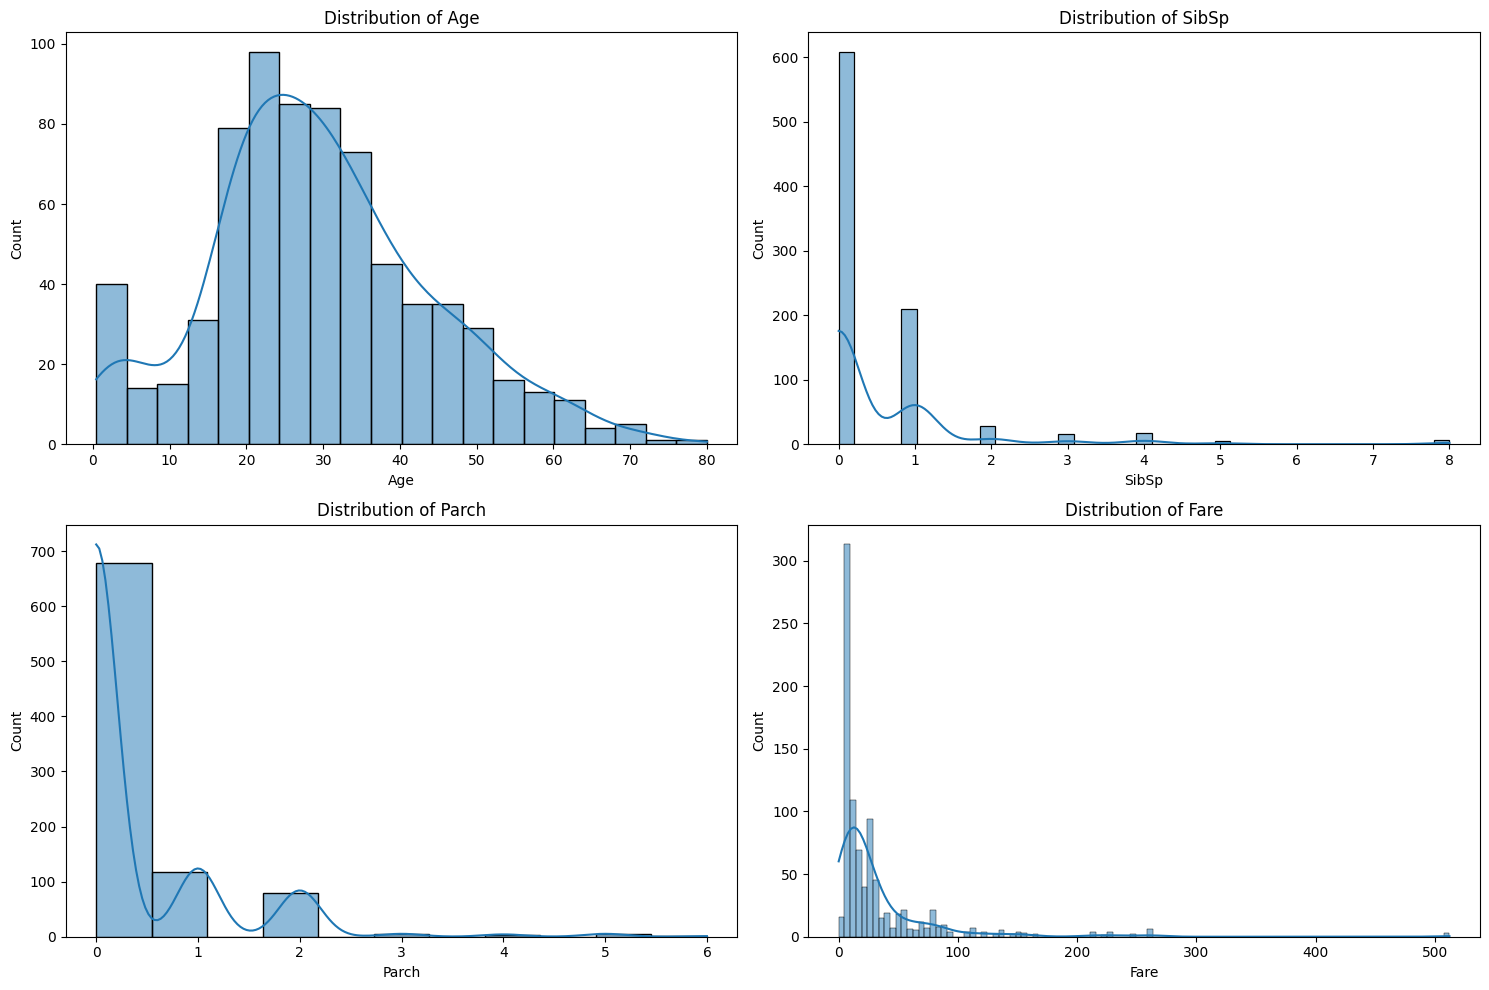

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['SibSp'], kde=True)
plt.title('Distribution of SibSp')

plt.subplot(2, 2, 3)
sns.histplot(df['Parch'], kde=True)
plt.title('Distribution of Parch')

plt.subplot(2, 2, 4)
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title('Distribution of Fare')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pclass')

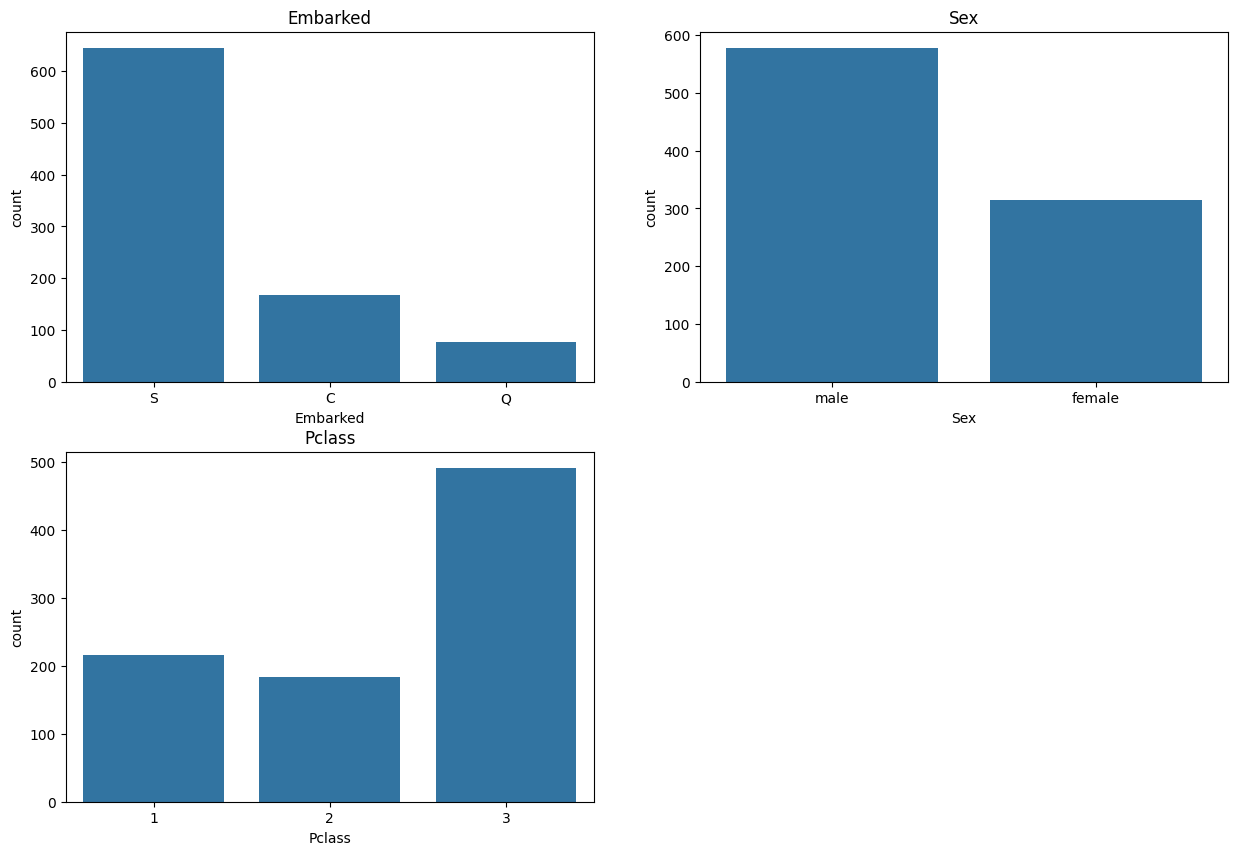

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Embarked', data=df)
plt.title('Embarked')

plt.subplot(2, 2, 2)
sns.countplot(x='Sex', data=df)
plt.title('Sex')

plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', data=df)
plt.title('Pclass')

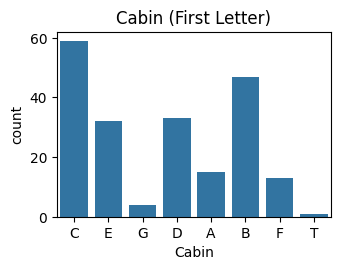

In [12]:
plt.subplot(2, 2, 4)
cabin_first_letter = df['Cabin'].dropna().astype(str).str[0]
sns.countplot(x=cabin_first_letter)
plt.title('Cabin (First Letter)')
plt.tight_layout()
plt.show()

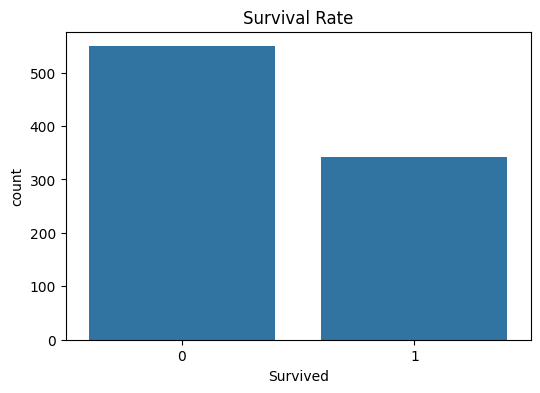

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Rate')
plt.show()

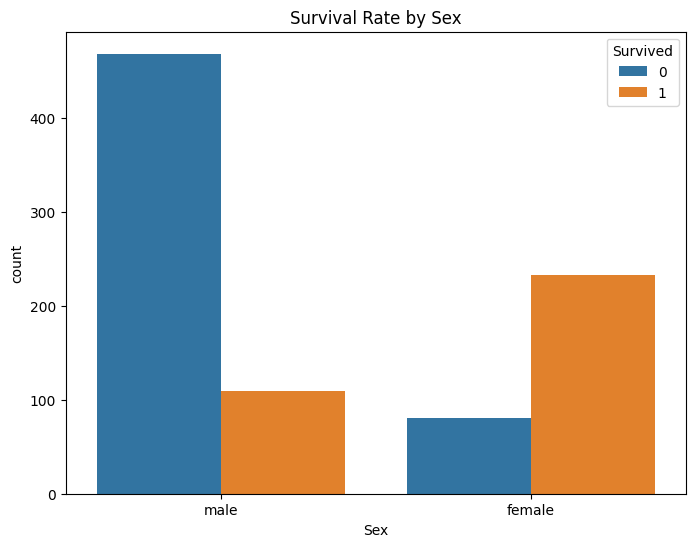

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

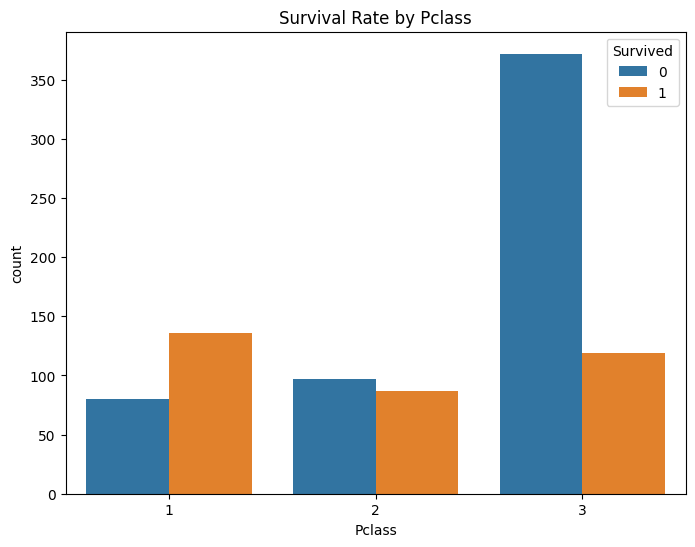

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

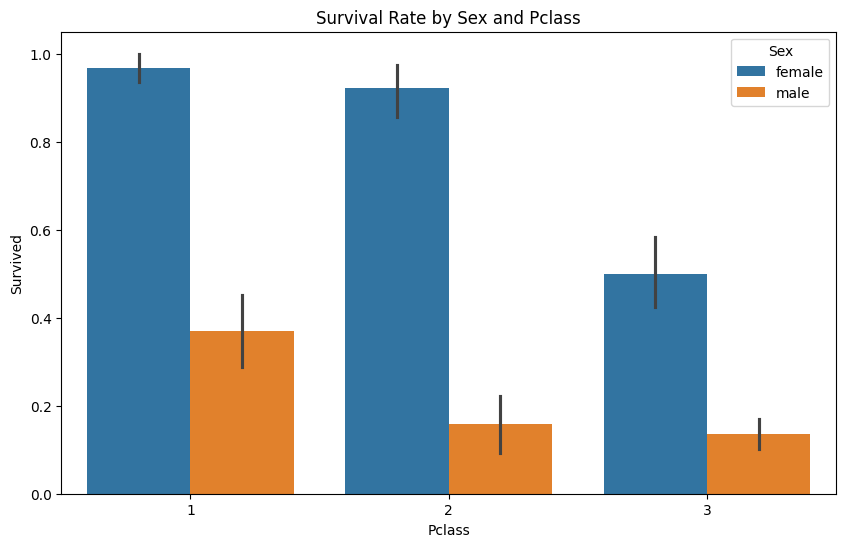

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title('Survival Rate by Sex and Pclass')
plt.show()